In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%matplotlib inline
import _init_paths
from PIL import Image
import matplotlib.pyplot as plt
from ult.config import cfg

import _init_paths
import pickle
import json
import numpy as np
import cv2
import os
import sys

CLASSES = ('__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus','train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter','bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack','umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite','baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl','banana', 'apple', 'sandwich', 'orange', 'broccoli','carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table','toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven','toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier','toothbrush')

In [3]:
with open( cfg.ROOT_DIR + "/demo/test_HOI_Detection.pkl", "rb" ) as gt:
        u_gt = pickle._Unpickler(gt)
        u_gt.encoding = 'latin1'
        Detection = u_gt.load()
# Detection = pickle.load(  )

In [3]:
print(Detection[0])

{'image_id': 'HICO_train2015_00025967.jpg', 'person_box': array([228.73068, 116.70716, 281.07855, 179.99811], dtype=float32), 'surf_instr_agent': 7.337415e-06, 'ski_instr_agent': 2.1700444e-05, 'cut_instr_agent': 1.9005367e-05, 'walk_agent': 9.934865e-09, 'cut_obj_agent': 1.3403661e-05, 'ride_instr_agent': 0.09831535, 'talk_on_phone_instr_agent': 0.0002271595, 'kick_obj_agent': 5.168888e-06, 'work_on_computer_instr_agent': 7.626105e-05, 'eat_obj_agent': 5.279195e-06, 'sit_instr_agent': 0.5669488, 'jump_instr_agent': 5.324194e-06, 'lay_instr_agent': 0.0008995642, 'drink_instr_agent': 0.00021740317, 'carry_obj_agent': 3.5583813e-05, 'throw_obj_agent': 4.3442036e-05, 'eat_instr_agent': 7.087214e-06, 'smile_agent': 1.6071873e-07, 'look_obj_agent': 6.5511424e-10, 'hit_instr_agent': 1.3571089e-05, 'hit_obj_agent': 1.8693992e-05, 'snowboard_instr_agent': 0.00012631064, 'run_agent': 0.00016074667, 'point_instr_agent': 0.016815994, 'read_obj_agent': 2.036674e-05, 'hold_obj_agent': 0.0017882553,

image_id
person_box
surf_instr_agent
ski_instr_agent
cut_instr_agent
walk_agent
cut_obj_agent
ride_instr_agent
talk_on_phone_instr_agent
kick_obj_agent
work_on_computer_instr_agent
eat_obj_agent
sit_instr_agent
jump_instr_agent
lay_instr_agent
drink_instr_agent
carry_obj_agent
throw_obj_agent
eat_instr_agent
smile_agent
look_obj_agent
hit_instr_agent
hit_obj_agent
snowboard_instr_agent
run_agent
point_instr_agent
read_obj_agent
hold_obj_agent
skateboard_instr_agent
stand_agent
catch_obj_agent
surf_instr
ski_instr
cut_instr
walk
cut_obj
ride_instr
talk_on_phone_instr
kick_obj
work_on_computer_instr
eat_obj
sit_instr
jump_instr
lay_instr
drink_instr
carry_obj
throw_obj
eat_instr
smile
look_obj
hit_instr
hit_obj
snowboard_instr
run
point_instr
read_obj
hold_obj
skateboard_instr
stand
catch_obj
1
image_id
person_box
surf_instr_agent
ski_instr_agent
cut_instr_agent
walk_agent
cut_obj_agent
ride_instr_agent
talk_on_phone_instr_agent
kick_obj_agent
work_on_computer_instr_agent
eat_obj_agent
s

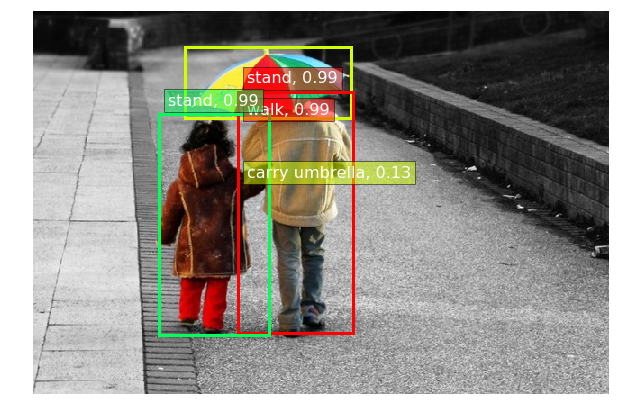

In [8]:
# image_id = 'Djokovic_0001.png'
image_id = 'test2015/HICO_test2015_00002076.jpg'
file_name = 'HICO_test2015_00002076.jpg'
cc = plt.get_cmap('hsv', lut=6)
dpi = 80

im_file = cfg.ROOT_DIR + '/demo/' + image_id
im_data = plt.imread(im_file)
height, width, nbands = im_data.shape
figsize = width / float(dpi), height / float(dpi)
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.imshow(im_data, interpolation='nearest')

HO_dic = {}
HO_set = set()
count = 0
# print(Detection)

for ele in Detection:
    if (ele['image_id'] == file_name):
        action_count = -1
        H_box = ele['person_box'] 
        
        if tuple(H_box) not in HO_set:
            HO_dic[tuple(H_box)] = count
            HO_set.add(tuple(H_box))
            count += 1 
        
        show_H_flag = 0
        
        if ele['smile'][4] > 0.5:
            ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
            'smile, ' + "%.2f" % ele['smile'][4] ,
            bbox=dict(facecolor=cc(HO_dic[tuple(H_box)])[:3], alpha=0.5),
            fontsize=16, color='white')
            action_count += 1 
            show_H_flag = 1

        if ele['stand'][4] > 0.5:
            ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
            'stand, ' + "%.2f" % ele['stand'][4] ,
            bbox=dict(facecolor=cc(HO_dic[tuple(H_box)])[:3], alpha=0.5),
            fontsize=16, color='white')
            action_count += 1             
            show_H_flag = 1

        if ele['run'][4] > 0.5:
            ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
            'run, ' + "%.2f" % ele['run'][4] ,
            bbox=dict(facecolor=cc(HO_dic[tuple(H_box)])[:3], alpha=0.5),
            fontsize=16, color='white')
            action_count += 1  
            show_H_flag = 1

        if ele['walk'][4] > 0.5:
            ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
            'walk, ' + "%.2f" % ele['walk'][4] ,
            bbox=dict(facecolor=cc(HO_dic[tuple(H_box)])[:3], alpha=0.5),
            fontsize=16, color='white')
            action_count += 1  
            show_H_flag = 1
        
        for action_key, action_value in ele.items():
            print(action_key)
            if (action_key.split('_')[-1] != 'agent') and action_key != 'image_id' and action_key != 'person_box':
                if (not np.isnan(action_value[0])) and (action_value[5] > 0.05):
                    O_box = action_value[:4]
                    
                    action_count += 1
                    
                    if tuple(O_box) not in HO_set:
                        HO_dic[tuple(O_box)] = count
                        HO_set.add(tuple(O_box))
                        count += 1      
                
                    ax.add_patch(
                    plt.Rectangle((H_box[0], H_box[1]),
                                  H_box[2] - H_box[0],
                                  H_box[3] - H_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(H_box)])[:3], linewidth=3)
                    )
                    text = action_key.split('_')[0] + ' ' + CLASSES[np.int(action_value[4])] + ', ' + "%.2f" % action_value[5]

                    ax.text(H_box[0] + 10, H_box[1] + 25 + action_count * 35,
                        text,
                        bbox=dict(facecolor=cc(HO_dic[tuple(O_box)])[:3], alpha=0.5),
                        fontsize=16, color='white')

                    ax.add_patch(
                    plt.Rectangle((O_box[0], O_box[1]),
                                  O_box[2] - O_box[0],
                                  O_box[3] - O_box[1], fill=False,
                                  edgecolor=cc(HO_dic[tuple(O_box)])[:3], linewidth=3)
                    )
                    ax.set(xlim=[0, width], ylim=[height, 0], aspect=1)
        print(show_H_flag)
        if show_H_flag == 1:
            ax.add_patch(
            plt.Rectangle((H_box[0], H_box[1]),
                          H_box[2] - H_box[0],
                          H_box[3] - H_box[1], fill=False,
                          edgecolor=cc(HO_dic[tuple(H_box)])[:3], linewidth=3)
            )

'diningtable'